In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Data Preprocessing

### Customer ID

In [8]:
df = df.copy()

# Remove the 'Customer ID' column as it's not relevant for the prediction model.
df.drop('customerID', axis=1, inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


### TotalCharges

In [10]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [11]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
len(df[df['TotalCharges']==' '])

11

#### Convert the 'TotalCharges' column to numeric, handling non-numeric values (likely due to whitespace) by converting them to NaN.

In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
len(df[df['TotalCharges']==' '])

0

#### Inspect the rows with previously problematic 'TotalCharges' values to verify successful conversion to NaN.

In [17]:
df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Split the data into training, validation, and testing sets for a robust model evaluation.

In [103]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_validation = train_test_split(df_full_train, test_size=0.2, random_state=1)

print("Size of Training Set:", df_train.shape)
print("Size of Validation Set:", df_validation.shape)
print("Size of Testing Set:", df_test.shape)

Size of Training Set: (4507, 20)
Size of Validation Set: (1127, 20)
Size of Testing Set: (1409, 20)


### Missing Values

In [105]:
df_train.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [107]:
df_train['totalcharges'].describe()

count    4507.000000
mean     2239.464489
std      2247.288739
min        18.800000
25%       386.850000
50%      1363.450000
75%      3708.000000
max      8684.800000
Name: totalcharges, dtype: float64

<Axes: >

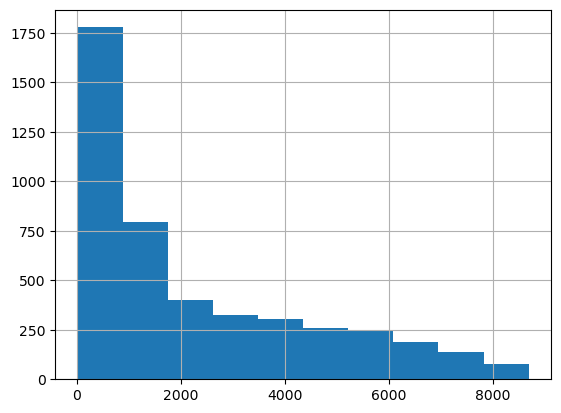

In [108]:
df_train['totalcharges'].hist()

### Impute missing values in 'TotalCharges' with the median due to its skewed distribution.

In [109]:
df_train['totalcharges'] = df_train['totalcharges'].fillna(df_train['totalcharges'].median())

In [110]:
df_train.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [26]:
df.columns = df.columns.str.lower()

In [27]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [29]:
df[df['churn'] == 'Yes']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [30]:
df['churn'] == 'Yes'

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: churn, Length: 7043, dtype: bool

In [31]:
(df['churn'] == 'Yes').astype(int)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [32]:
df['churn'] = (df['churn'] == 'Yes').astype(int)

In [33]:
# Check the class distribution in the 'churn' column
df['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [34]:
# Calculate the class imbalance ratio
df['churn'].value_counts(normalize=True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [35]:
df.select_dtypes(include=['object'])

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [36]:
df['seniorcitizen'] = df['seniorcitizen'].astype('object')

### Senior Citizen

#### Convert 'SeniorCitizen' to categorical for better model interpretation

In [37]:
df.select_dtypes(include=['object'])

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


### EDA

In [111]:
df_train.select_dtypes(include=['object']).columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [112]:
categorical_features = list(df_train.select_dtypes(include=['object']).columns)
numerical_features = list(df_train.select_dtypes(include=['number']).columns)

#### Exclude 'churn' as it's the target variable

In [113]:
numerical_features.remove('churn')

In [114]:
numerical_features

['tenure', 'monthlycharges', 'totalcharges']

In [115]:
df_train[categorical_features].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature Importance

#### Identify feature importance for categorical features using risk ratio and mutual information.

### Risk Ratio

#### - A risk ratio close to 1 indicates the group's churn rate is similar to the overall population.
#### - A risk ratio less than 1 indicates a lower churn rate compared to the population.
#### - A risk ratio greater than 1 indicates a higher churn rate compared to the population.

#### Calculate the global churn rate

In [116]:
global_churn_rate = df_train['churn'].mean()
round(global_churn_rate, 2)

0.27

In [117]:
churn_gender = df_train.groupby('gender')['churn'].mean()
churn_gender

gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64

In [118]:
churn_partner = df_train.groupby('partner')['churn'].mean()
churn_partner

partner
No     0.325838
Yes    0.204651
Name: churn, dtype: float64

#### Calculate the risk ratio for each group relative to the global churn rate

In [119]:
gender_risk_ratio = churn_gender / global_churn_rate
gender_risk_ratio

gender
Female    1.023245
Male      0.976682
Name: churn, dtype: float64

In [120]:
partner_risk_ratio = churn_partner / global_churn_rate
partner_risk_ratio

partner
No     1.215688
Yes    0.763545
Name: churn, dtype: float64

In [121]:
from IPython.display import display
for feature in categorical_features:                                           
    df_group = df_train.groupby(by=feature)['churn'].agg(['mean']) 
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

,mean,diff,risk
gender,,,
Female,0.274258,0.00623,1.023245
Male,0.261778,-0.00625,0.976682


,mean,diff,risk
seniorcitizen,,,
0,0.241700,-0.026328,0.901773
1,0.401617,0.133590,1.498418


,mean,diff,risk
partner,,,
No,0.325838,0.057810,1.215688
Yes,0.204651,-0.063376,0.763545


,mean,diff,risk
dependents,,,
No,0.312599,0.044572,1.166295
Yes,0.164454,-0.103573,0.613572


,mean,diff,risk
phoneservice,,,
No,0.249438,-0.018589,0.930644
Yes,0.270064,0.002036,1.007598


,mean,diff,risk
multiplelines,,,
No,0.253358,-0.014669,0.945269
No phone service,0.249438,-0.018589,0.930644
Yes,0.289017,0.020990,1.078312


,mean,diff,risk
internetservice,,,
DSL,0.195232,-0.072796,0.728403
Fiber optic,0.421779,0.153752,1.573641
No,0.080080,-0.187947,0.298776


,mean,diff,risk
onlinesecurity,,,
No,0.419964,0.151937,1.566869
No internet service,0.080080,-0.187947,0.298776
Yes,0.151090,-0.116937,0.563712


,mean,diff,risk
onlinebackup,,,
No,0.396020,0.127992,1.477535
No internet service,0.080080,-0.187947,0.298776
Yes,0.221629,-0.046399,0.826888


,mean,diff,risk
deviceprotection,,,
No,0.392514,0.124486,1.464454
No internet service,0.080080,-0.187947,0.298776
Yes,0.229915,-0.038112,0.857804


,mean,diff,risk
techsupport,,,
No,0.416554,0.148526,1.554145
No internet service,0.080080,-0.187947,0.298776
Yes,0.159599,-0.108428,0.595458


,mean,diff,risk
streamingtv,,,
No,0.344674,0.076646,1.285964
No internet service,0.080080,-0.187947,0.298776
Yes,0.297376,0.029349,1.109498


,mean,diff,risk
streamingmovies,,,
No,0.338609,0.070582,1.263338
No internet service,0.080080,-0.187947,0.298776
Yes,0.304198,0.036170,1.134950


,mean,diff,risk
contract,,,
Month-to-month,0.432509,0.164482,1.613674
One year,0.115822,-0.152205,0.432128
Two year,0.027027,-0.241000,0.100837


,mean,diff,risk
paperlessbilling,,,
No,0.171566,-0.096462,0.640106
Yes,0.336495,0.068467,1.255448


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.164622,-0.103406,0.614197
Credit card (automatic),0.175620,-0.092408,0.655231
Electronic check,0.441215,0.173188,1.646157
Mailed check,0.199618,-0.068410,0.744767


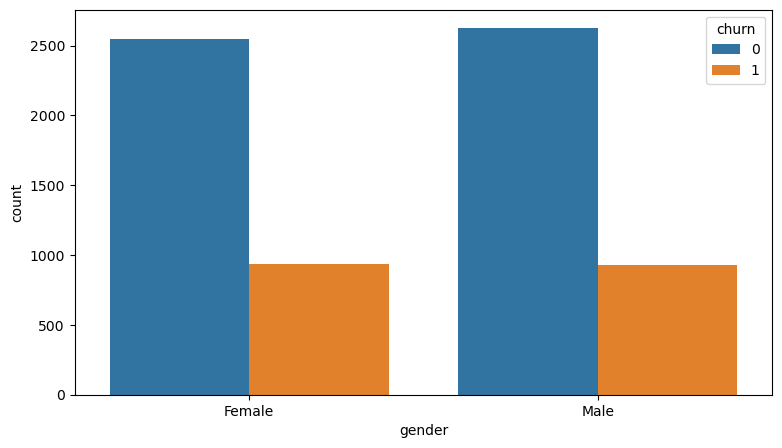

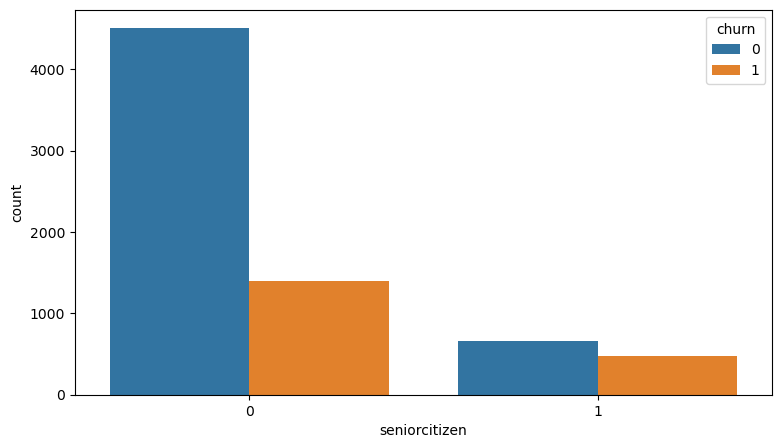

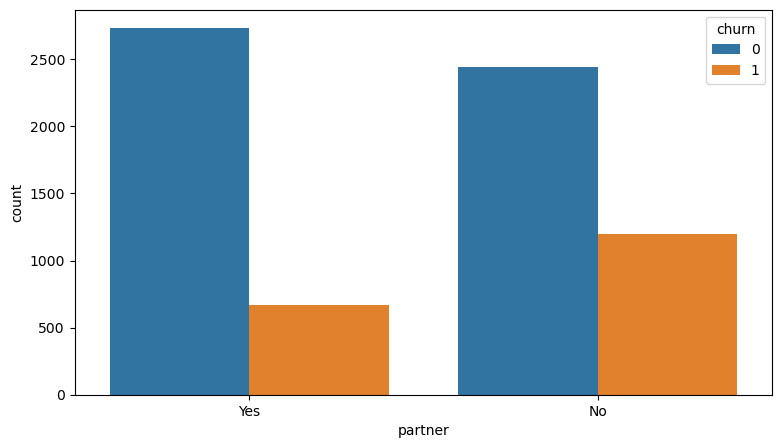

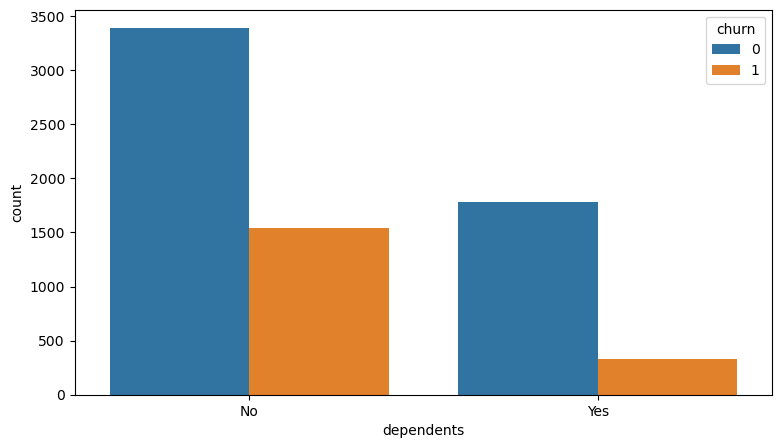

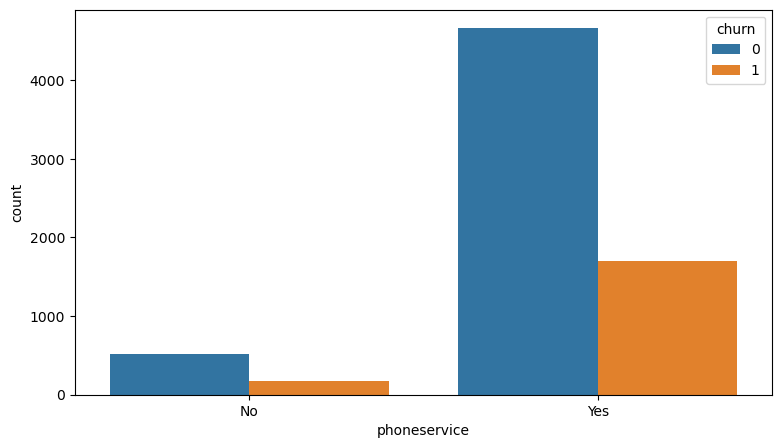

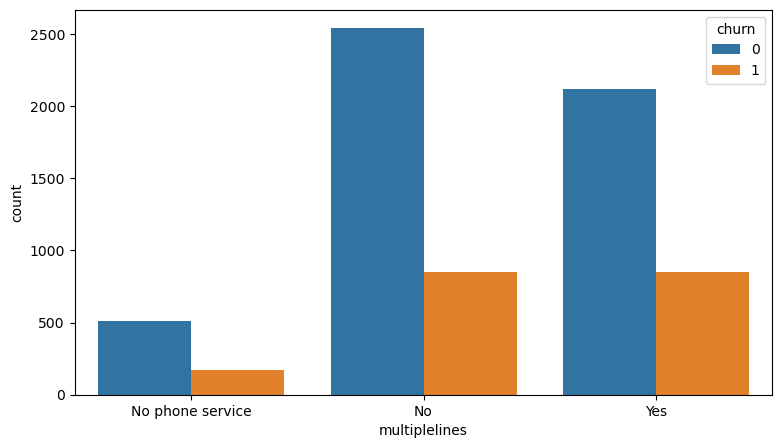

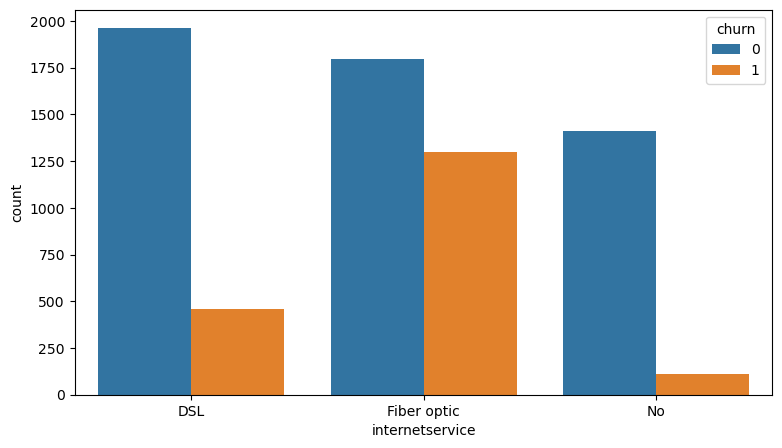

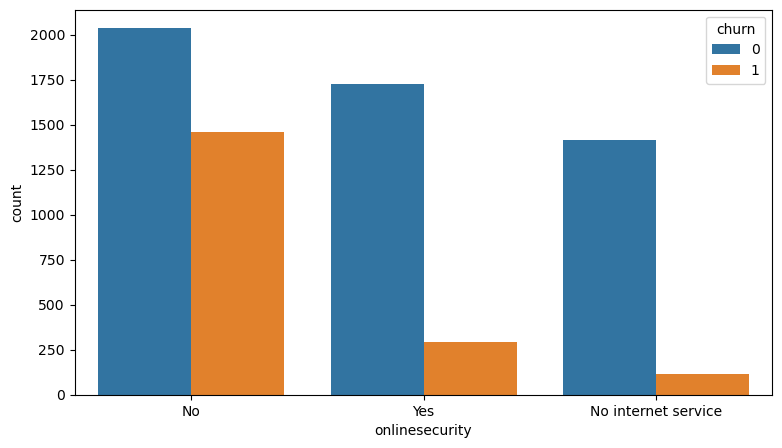

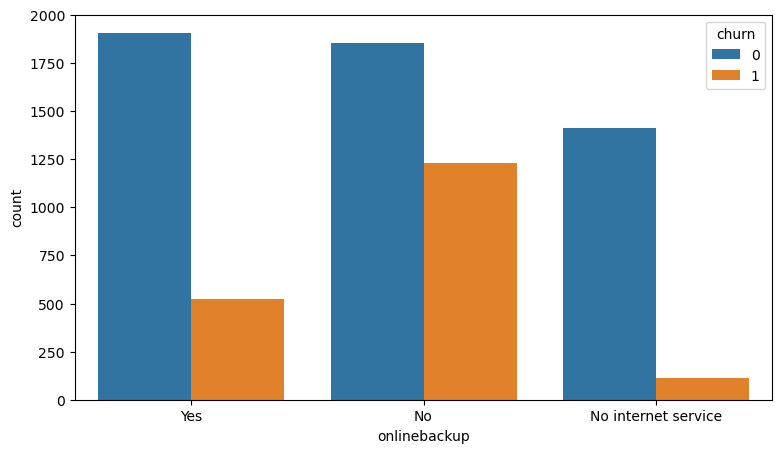

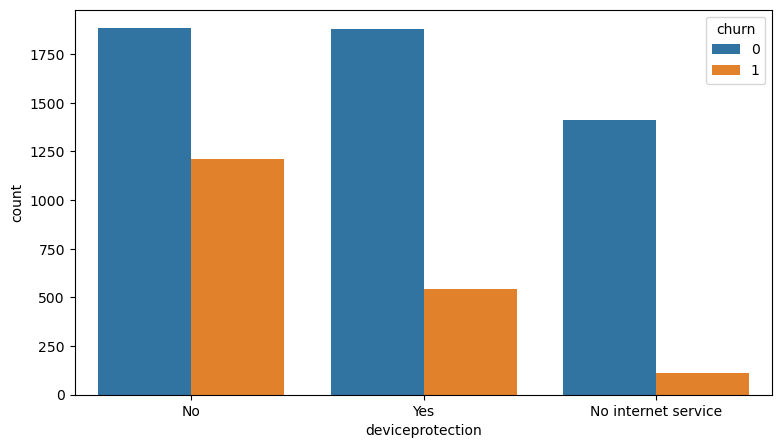

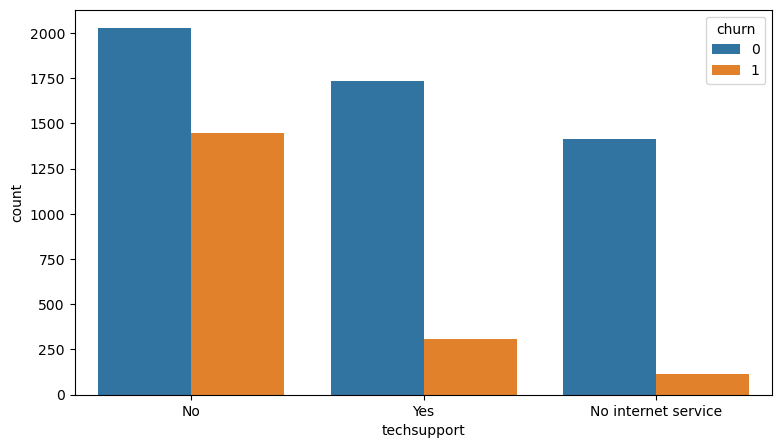

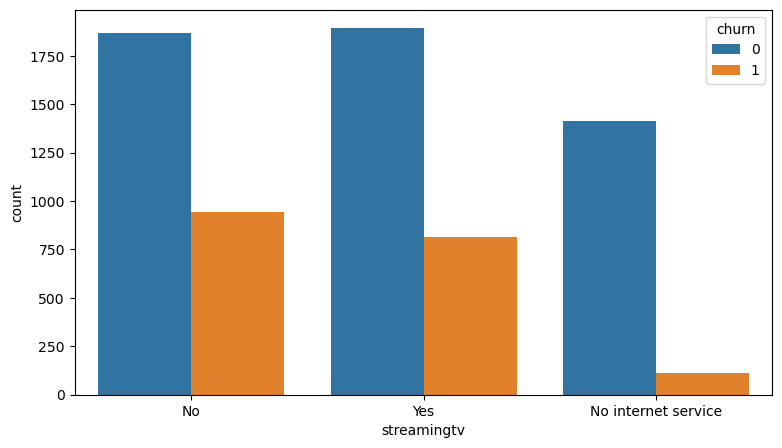

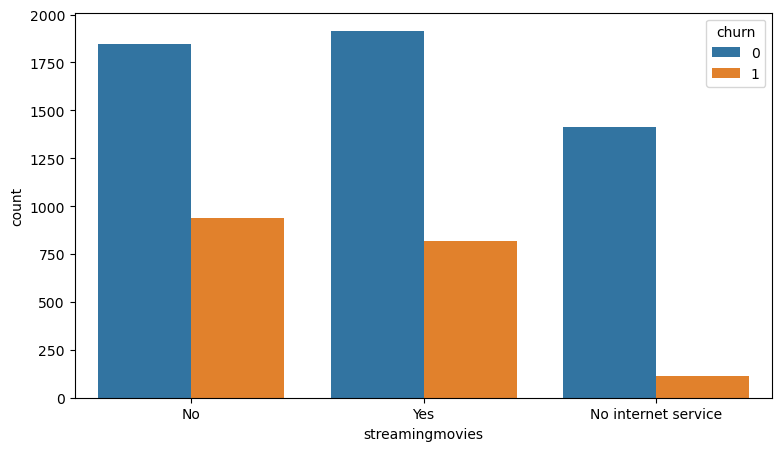

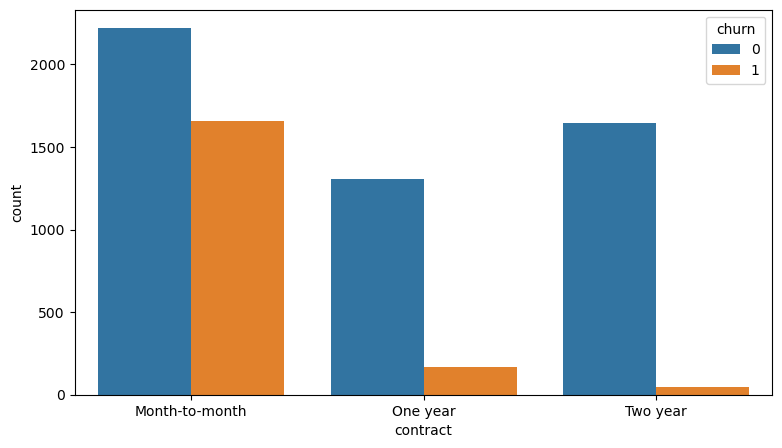

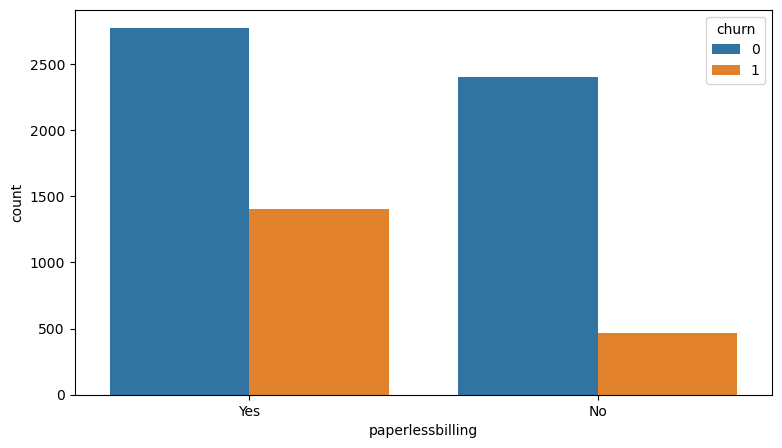

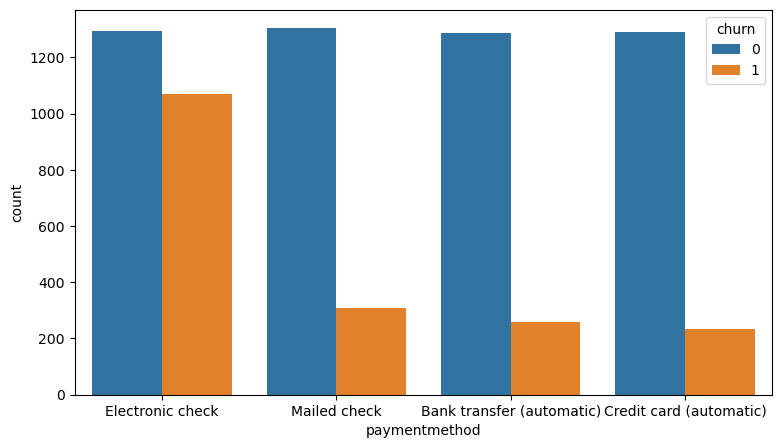

In [76]:
for feature in categorical_features[:]:
    plt.figure(figsize=(9, 5))
    _=sns.countplot(x= feature, hue='churn', data=df)
    plt.show()

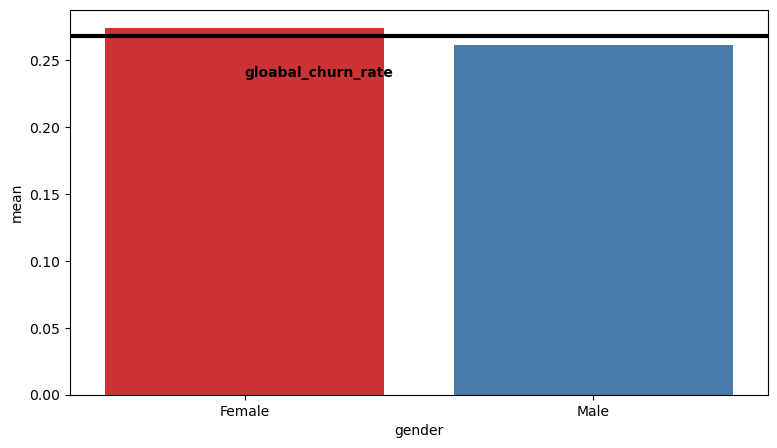

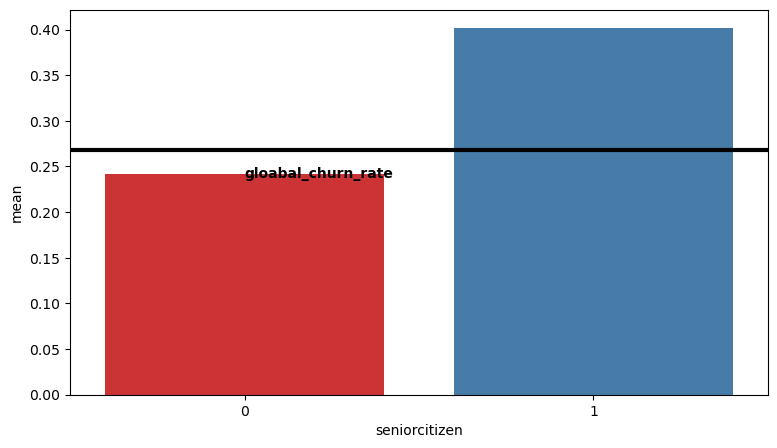

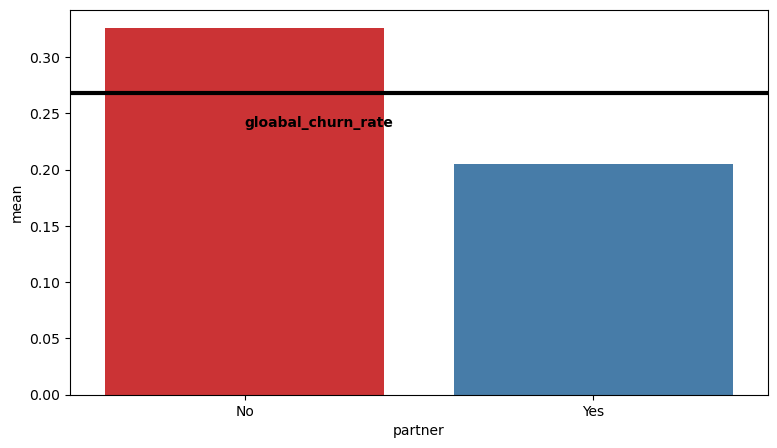

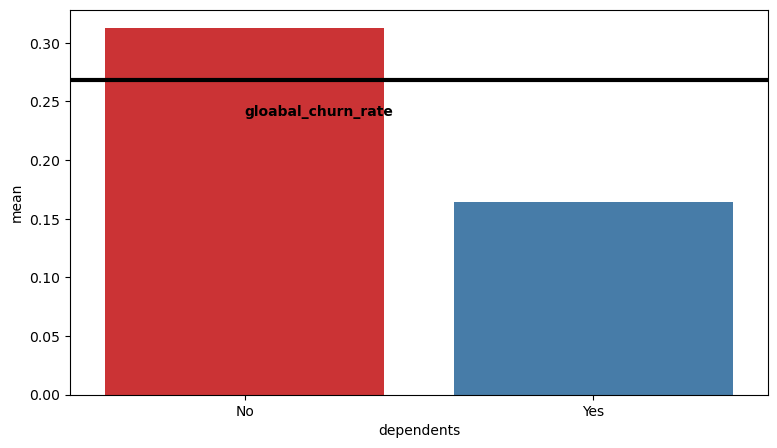

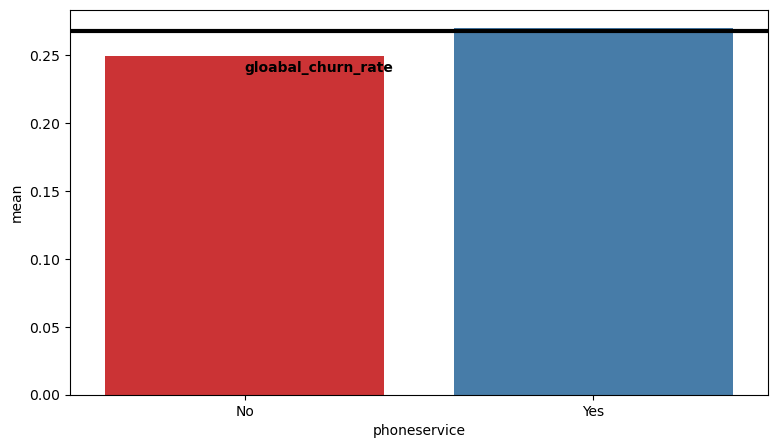

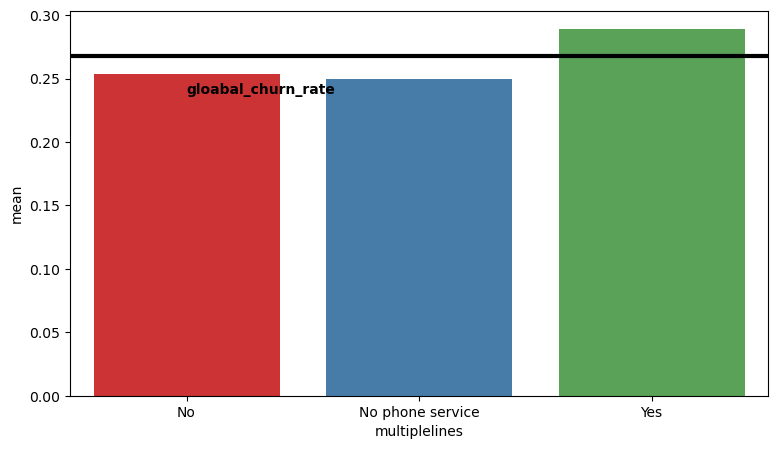

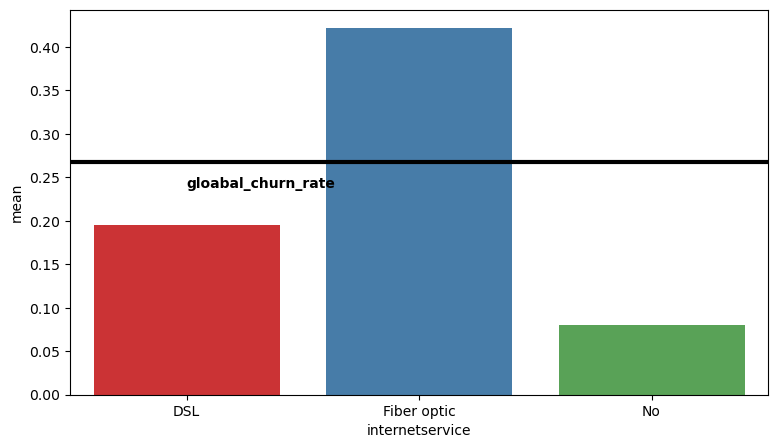

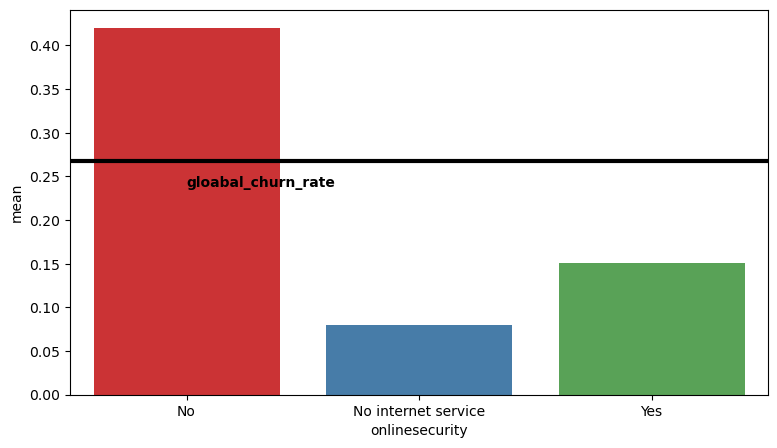

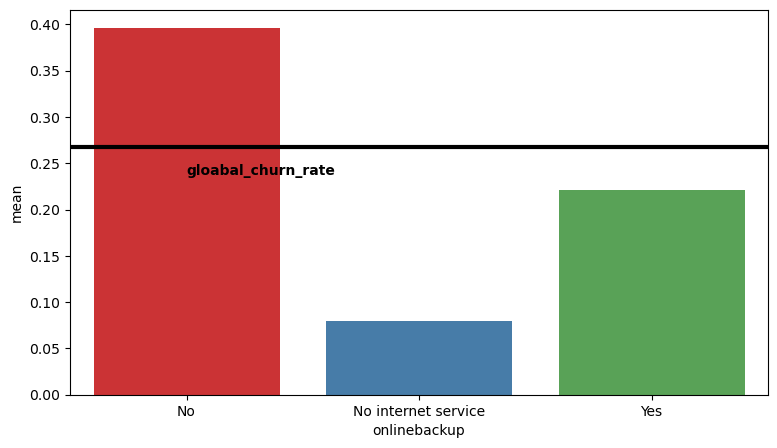

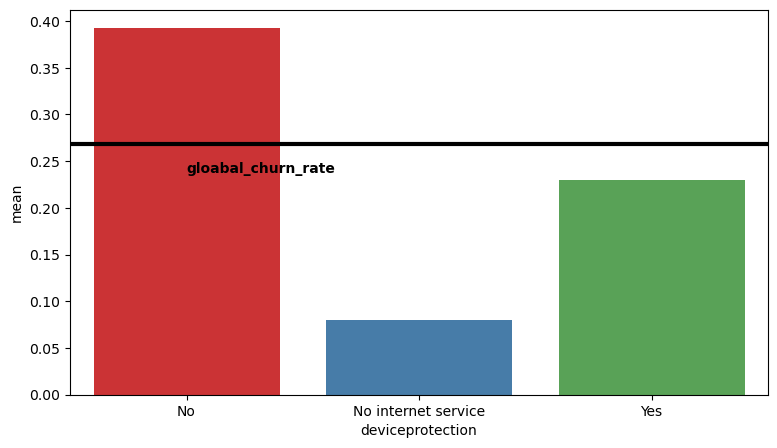

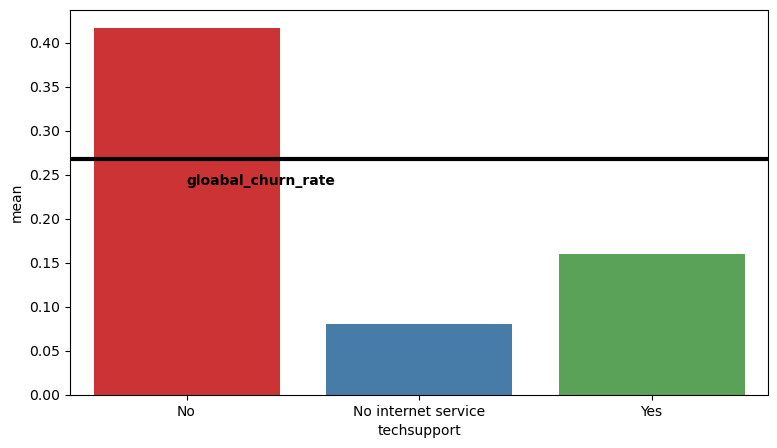

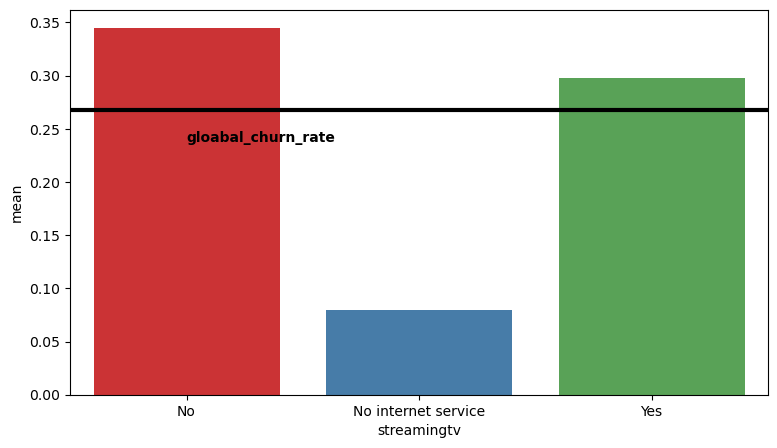

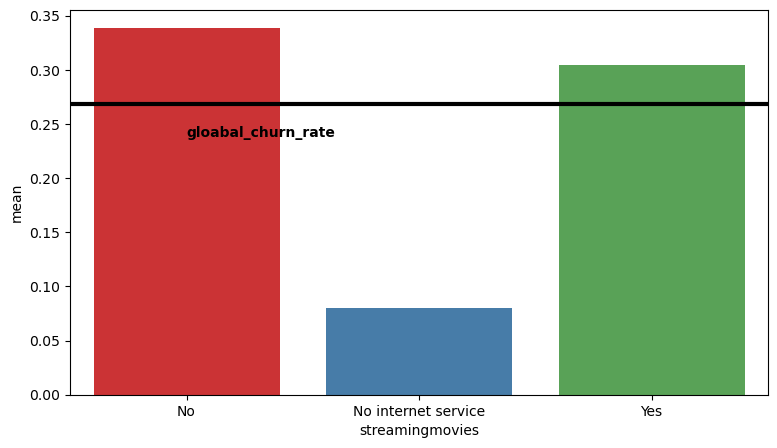

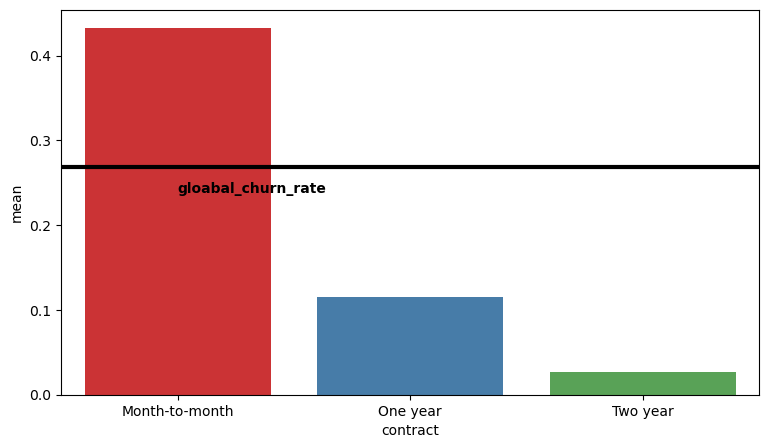

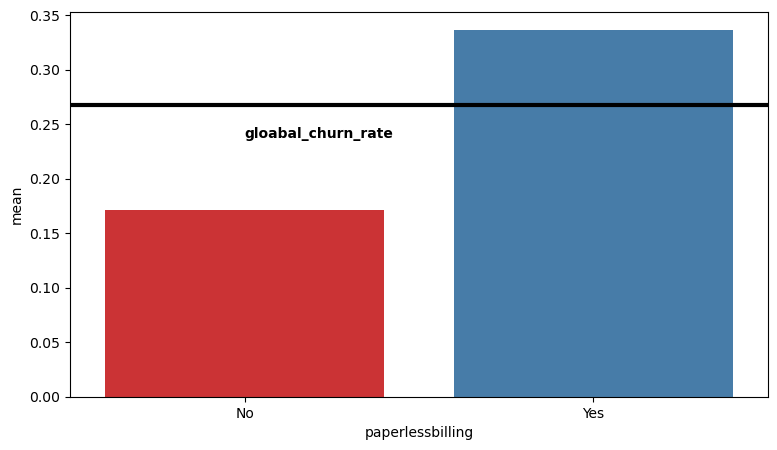

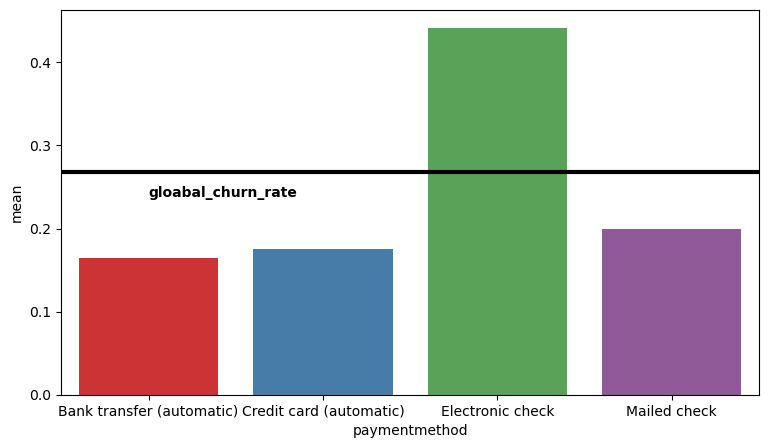

In [122]:
for feature in categorical_features:
    df_group = df_train.groupby(by=feature)['churn'].agg(['mean']).reset_index()
    plt.figure(figsize=(9, 5))
    graph = sns.barplot(x = feature, y = 'mean' , data = df_group, hue=feature, palette = 'Set1', legend=False)
    graph.axhline(global_churn_rate, linewidth = 3, color = 'black')
    plt.text(0, global_churn_rate - 0.03, 'gloabal_churn_rate', color = 'black', weight = 'semibold')
    plt.show()

### Insights from Data Analysis:

#### - Gender: No significant difference in churn rates observed between male and female customers.
#### - Senior Citizens: Senior citizens are more likely to churn compared to non-senior citizens.
#### - Partnership Status: Customers with partners tend to have lower churn rates.
#### - Phone Service: Customers who use phone service have lower churn rates, while those who don't use it have the lowest churn rates.
#### - Tech Support: Customers without tech support are more likely to churn.
#### - Contract Type: Customers with monthly contracts have a higher churn rate compared to those with two-year contracts.

### Mutual Information:
#### Mutual Information (MI) measures the dependency between a feature and the target variable, quantifying how much knowing the feature reduces uncertainty about the target. It is particularly useful for ranking feature importance.

#### Formula:
#### MI(feature; target) = Entropy(feature) - Entropy(feature | target)

#### Entropy(feature): Measures the uncertainty in the feature.
#### Entropy(feature | target): Measures the uncertainty in the feature when the target is known.

#### - High MI (e.g., MI > 0.5) : Strong dependency; the feature provides significant information about the target.
#### - Low MI (e.g., MI < 0.1): Weak dependency; the feature has minimal impact on the target.
#### - MI = 0: Complete independence; the feature has no relationship with the target.
#### MI detects both linear and non-linear relationships, making it more robust than correlation for identifying feature relevance.
#### Categorical variables: MI is ideal for categorical data but requires adaptation for numerical features, such as binning or discretization.

In [261]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train['churn'])

df_mi = df_train[categorical_features].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi)

,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230
deviceprotection,0.042465
paymentmethod,0.037791
streamingtv,0.031625
streamingmovies,0.031155
paperlessbilling,0.017462


### Correlation Coefficient Analysis for Numerical Features:
#### The Pearson Correlation Coefficient quantifies the linear relationship between two variables, ranging from -1 to 1.

#### - Positive Correlation: A value closer to 1 indicates that when one variable increases, the other tends to increase.
#### For a binary target, high feature values correlate with more ones in the target, while low feature values correlate with more zeros.
#### - Zero Correlation: A value near 0 indicates no linear relationship, suggesting that the variables are independent.
#### - Negative Correlation: A value closer to -1 indicates an inverse relationship. 
#### For a binary target, high feature values are associated with more zeros, and low feature values are associated with more ones.

In [264]:
df[['tenure', 'monthlycharges', 'totalcharges']].corrwith(df['churn'])

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.199037
dtype: float64

### Tenure and Churn:
#### A negative correlation (-0.35) indicates that customers with longer tenure tend to have lower churn rates.

In [129]:
t1 = df[df['tenure'] <= 2]['churn'].mean()
t1

0.5835266821345708

In [134]:
t2 = df[(df['tenure'] >= 3) & (df['tenure'] <= 12)]['churn'].mean()
t2

0.4033232628398791

In [135]:
t3 = df[df['tenure'] >= 12].churn.mean()
t3

0.17490952955367914

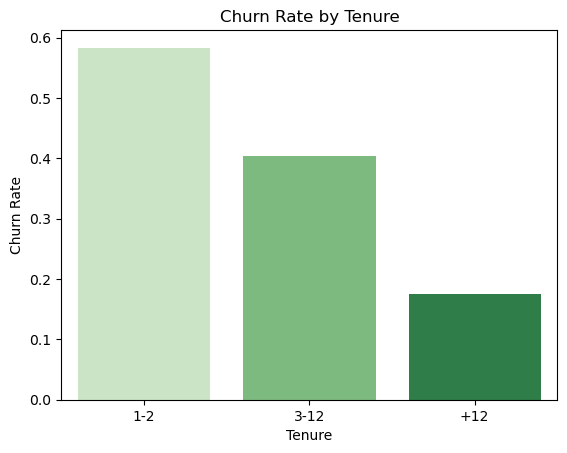

In [138]:
sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens', hue = ['1-2', '3-12', '+12'], legend=False);
plt.title('Churn Rate by Tenure');
plt.xlabel('Tenure');
plt.ylabel('Churn Rate');

### Monthly Charges and Churn:
#### A positive coefficient of 0.19 indicates a positive correlation between monthly charges and churn, suggesting that customers with higher monthly charges are more likely to churn.

In [139]:
mc1 =df[df['monthlycharges'] <= 20].churn.mean()
mc1

0.08841463414634146

In [140]:
mc2 = df[(df.monthlycharges >= 21) & (df.monthlycharges <= 50)].churn.mean()
mc2

0.22807017543859648

In [141]:
mc3 = df[df['monthlycharges'] > 50].churn.mean()
mc3

0.3178752107925801

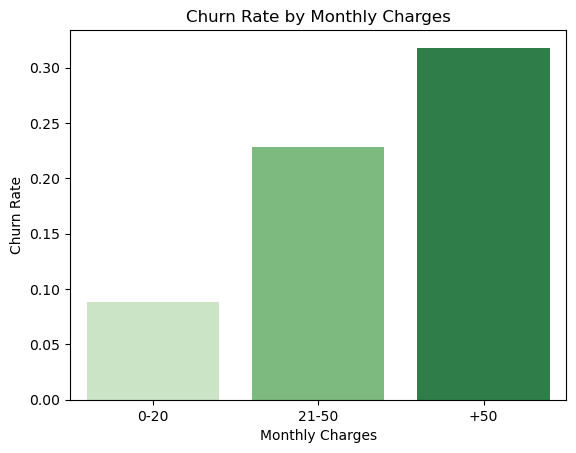

In [142]:
sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens', hue = ['0-20', '21-50', '+50'], legend=False);
plt.title('Churn Rate by Monthly Charges');
plt.xlabel('Monthly Charges');
plt.ylabel('Churn Rate');

### Total Charges and Churn:
#### A negative correlation between total charges and churn indicates that customers with higher total charges (i.e., longer tenure) are less likely to churn.

In [143]:
tc1 = df[df['totalcharges'] <= 1000].churn.mean()
tc1

0.36985827860352577

In [144]:
tc2 = df[(df.totalcharges > 1000) & (df.totalcharges <= 5000)].churn.mean()
tc2

0.21293532338308457

In [145]:
tc3 = df[df['totalcharges'] > 5000].churn.mean()
tc3

0.13832599118942732

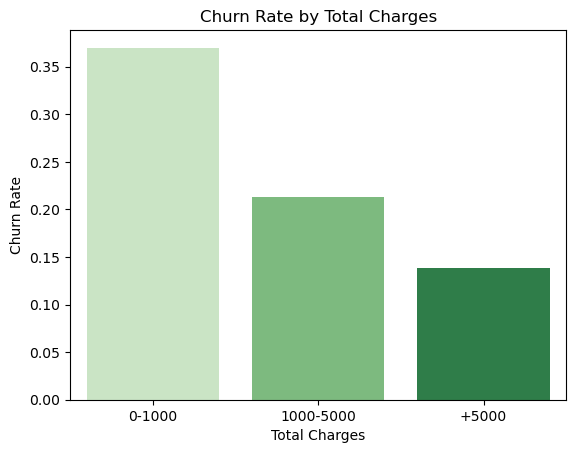

In [146]:
sns.barplot(x =['0-1000', '1000-5000', '+5000'], y =[tc1,tc2,tc3], palette='Greens', hue = ['0-1000', '1000-5000', '+5000'], legend=False);
plt.title('Churn Rate by Total Charges');
plt.xlabel('Total Charges');
plt.ylabel('Churn Rate');

#### We will train and evaluate the model using both the full feature set and a subset of the most important features to assess the impact of feature selection on model performance.

### Feature Engineering

In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

#### Encode Categorical Variables

In [220]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

binary_cols = [col for col in categorical_features if df_train[col].nunique() == 2]
multi_class_cols = [col for col in categorical_features if col not in binary_cols]

# Label Encoding for binary columns
for col in binary_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])

# OneHotEncoding for multi-class columns using Sklearn
ohe = OneHotEncoder(drop='first', sparse_output=False)  # Drop first to avoid dummy variable trap

# Make a transformer for OneHotEncoding
transformer = make_column_transformer(
    (ohe, multi_class_cols),
    remainder='passthrough',  # Keep all other (numerical) columns as is
    verbose_feature_names_out=False
)

train_enc = transformer.fit_transform(df_train)

df_train_enc = pd.DataFrame(train_enc, columns=transformer.get_feature_names_out())

# Ensure numerical types
df_train_enc = df_train_enc.apply(pd.to_numeric)

df_train_enc.head()

,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,...,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,avg_monthly_charge,charge_ratio
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,30.0,1.0,0.0,19.70,625.05,0.0,20.835000,0.031517
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,23.0,1.0,1.0,83.75,1849.95,0.0,80.432609,0.045271
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,14.0,1.0,1.0,95.80,1346.30,0.0,96.164286,0.071158
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,56.0,1.0,0.0,19.70,1051.90,0.0,18.783929,0.018728
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,63.0,1.0,0.0,98.00,6218.45,0.0,98.705556,0.015760


#### Handle Class Imbalance

In [153]:
df_train['churn'].value_counts()

churn
0    3299
1    1208
Name: count, dtype: int64

#### Apply SMOTE to balance the classes

In [221]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_train_enc.drop('churn', axis=1)
y = df_train_enc['churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='churn')

df_train_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Check the new class distribution
print(df_train_balanced['churn'].value_counts())

churn
0.0    3299
1.0    3299
Name: count, dtype: int64


#### Creating New Features

In [222]:
# Calculate charge ratios
df_train_balanced['avg_monthly_charge'] = df_train_balanced['totalcharges'] / df_train_balanced['tenure'].replace(0, 1)
df_train_balanced['charge_ratio'] = df_train_balanced['monthlycharges'] / df_train_balanced['totalcharges'].replace(0, 1)

# Replace infinities and NaNs with 0
df_train_balanced.replace([np.inf, -np.inf], 0, inplace=True)

df_train_balanced[['avg_monthly_charge', 'charge_ratio']].head()

,avg_monthly_charge,charge_ratio
0,20.835000,0.031517
1,80.432609,0.045271
2,96.164286,0.071158
3,18.783929,0.018728
4,98.705556,0.015760


In [223]:
df_train_balanced.head()

,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,...,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,avg_monthly_charge,charge_ratio,churn
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,30.0,1.0,0.0,19.70,625.05,20.835000,0.031517,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,23.0,1.0,1.0,83.75,1849.95,80.432609,0.045271,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,14.0,1.0,1.0,95.80,1346.30,96.164286,0.071158,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,56.0,1.0,0.0,19.70,1051.90,18.783929,0.018728,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,63.0,1.0,0.0,98.00,6218.45,98.705556,0.015760,0.0


In [224]:
df_train_balanced[['avg_monthly_charge', 'charge_ratio']].isnull().sum()

avg_monthly_charge    0
charge_ratio          0
dtype: int64

In [225]:
df_train_balanced[['avg_monthly_charge', 'charge_ratio']].corrwith(df_train_enc['churn'])

avg_monthly_charge    0.081687
charge_ratio          0.335483
dtype: float64

### Scale Numerical Features

In [226]:
df_train_balanced.describe().T

,count,mean,std,min,25%,50%,75%,max
multiplelines_No phone service,6598.0,0.093900,0.283956,0.000000,0.000000,0.000000,0.000000,1.000
multiplelines_Yes,6598.0,0.438646,0.479122,0.000000,0.000000,0.000000,1.000000,1.000
internetservice_Fiber optic,6598.0,0.517327,0.494781,0.000000,0.000000,1.000000,1.000000,1.000
internetservice_No,6598.0,0.171243,0.374844,0.000000,0.000000,0.000000,0.000000,1.000
onlinesecurity_No internet service,6598.0,0.171243,0.374844,0.000000,0.000000,0.000000,0.000000,1.000
onlinesecurity_Yes,6598.0,0.247308,0.415378,0.000000,0.000000,0.000000,0.464731,1.000
onlinebackup_No internet service,6598.0,0.171243,0.374844,0.000000,0.000000,0.000000,0.000000,1.000
onlinebackup_Yes,6598.0,0.317880,0.448844,0.000000,0.000000,0.000000,1.000000,1.000
deviceprotection_No internet service,6598.0,0.171243,0.374844,0.000000,0.000000,0.000000,0.000000,1.000
deviceprotection_Yes,6598.0,0.322368,0.448120,0.000000,0.000000,0.000000,1.000000,1.000


In [227]:
numerical_features = ["tenure", "monthlycharges", "totalcharges", "avg_monthly_charge", "charge_ratio"]
scaler = StandardScaler()
df_train_balanced[numerical_features] = scaler.fit_transform(df_train_balanced[numerical_features])

In [228]:
df_train_balanced.describe().T

,count,mean,std,min,25%,50%,75%,max
multiplelines_No phone service,6598.0,9.389962e-02,0.283956,0.000000,0.000000,0.000000,0.000000,1.000000
multiplelines_Yes,6598.0,4.386461e-01,0.479122,0.000000,0.000000,0.000000,1.000000,1.000000
internetservice_Fiber optic,6598.0,5.173273e-01,0.494781,0.000000,0.000000,1.000000,1.000000,1.000000
internetservice_No,6598.0,1.712435e-01,0.374844,0.000000,0.000000,0.000000,0.000000,1.000000
onlinesecurity_No internet service,6598.0,1.712435e-01,0.374844,0.000000,0.000000,0.000000,0.000000,1.000000
onlinesecurity_Yes,6598.0,2.473084e-01,0.415378,0.000000,0.000000,0.000000,0.464731,1.000000
onlinebackup_No internet service,6598.0,1.712435e-01,0.374844,0.000000,0.000000,0.000000,0.000000,1.000000
onlinebackup_Yes,6598.0,3.178795e-01,0.448844,0.000000,0.000000,0.000000,1.000000,1.000000
deviceprotection_No internet service,6598.0,1.712435e-01,0.374844,0.000000,0.000000,0.000000,0.000000,1.000000
deviceprotection_Yes,6598.0,3.223678e-01,0.448120,0.000000,0.000000,0.000000,1.000000,1.000000


### Split Data for Training and Testing 

In [229]:
X_train = df_train_balanced.drop('churn', axis=1)
y_train = df_train_balanced['churn']

In [160]:
df_validation.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [161]:
# Label Encoding for binary columns
for col in binary_cols:
    df_validation[col] = le.fit_transform(df_validation[col])

# OneHotEncoding for multi-class columns using Sklearn
validation_enc = transformer.fit_transform(df_validation)

df_validation_enc = pd.DataFrame(validation_enc, columns=transformer.get_feature_names_out())

# Ensure numerical types
df_validation_enc = df_validation_enc.apply(pd.to_numeric)

df_validation_enc.head()

,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,...,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,71.0,1.0,1.0,70.85,4973.40,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,20.75,20.75,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,20.35,20.35,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,75.70,189.20,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,19.90,19.90,0.0


#### Handle Class Imbalance for Validation Set

In [231]:
df_validation_enc['churn'].value_counts()

churn
0.0    814
1.0    313
Name: count, dtype: int64

In [232]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_validation_enc.drop('churn', axis=1)
y = df_validation_enc['churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='churn')

df_validation_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Check the new class distribution
print(df_validation_balanced['churn'].value_counts())

churn
0.0    814
1.0    814
Name: count, dtype: int64


In [233]:
# Calculate charge ratios
df_validation_enc['avg_monthly_charge'] = df_validation_enc['totalcharges'] / df_validation_enc['tenure'].replace(0, 1)
df_validation_enc['charge_ratio'] = df_validation_enc['monthlycharges'] / df_validation_enc['totalcharges'].replace(0, 1)

# Replace infinities and NaNs with 0
df_validation_enc.replace([np.inf, -np.inf], 0, inplace=True)

df_validation_enc[['avg_monthly_charge', 'charge_ratio']].head()

,avg_monthly_charge,charge_ratio
0,0.709392,0.128338
1,0.786363,1.467861
2,0.786493,1.480409
3,0.754902,-0.311286
4,0.786640,1.494521


In [234]:
df_validation_enc[numerical_features] = scaler.fit_transform(df_validation_enc[numerical_features])

In [235]:
X_validation = df_validation_enc.drop('churn', axis=1)
y_validation = df_validation_enc['churn']

In [163]:
df_test.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [164]:
# Label Encoding for binary columns
for col in binary_cols:
    df_test[col] = le.fit_transform(df_test[col])

# OneHotEncoding for multi-class columns using Sklearn
test_enc = transformer.fit_transform(df_test)

df_test_enc = pd.DataFrame(test_enc, columns=transformer.get_feature_names_out())

# Ensure numerical types
df_test_enc = df_test_enc.apply(pd.to_numeric)

df_test_enc.head()

,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,...,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,41.0,1.0,1.0,79.85,3320.75,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,66.0,1.0,1.0,102.40,6471.85,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,1.0,1.0,45.00,524.35,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,1.0,1.0,50.60,249.95,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,10.0,1.0,1.0,65.90,660.05,0.0


#### Handle Class Imbalance for Test Set

In [236]:
df_test_enc['churn'].value_counts()

churn
0.0    1061
1.0     348
Name: count, dtype: int64

In [237]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_test_enc.drop('churn', axis=1)
y = df_test_enc['churn']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='churn')

df_test_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Check the new class distribution
print(df_test_balanced['churn'].value_counts())

churn
0.0    1061
1.0    1061
Name: count, dtype: int64


In [238]:
# Calculate charge ratios
df_test_enc['avg_monthly_charge'] = df_test_enc['totalcharges'] / df_test_enc['tenure'].replace(0, 1)
df_test_enc['charge_ratio'] = df_test_enc['monthlycharges'] / df_test_enc['totalcharges'].replace(0, 1)

# Replace infinities and NaNs with 0
df_test_enc.replace([np.inf, -np.inf], 0, inplace=True)

df_test_enc[['avg_monthly_charge', 'charge_ratio']].head()

,avg_monthly_charge,charge_ratio
0,1.351169,1.111868
1,1.362862,0.680785
2,0.923962,0.840715
3,0.798083,0.520786
4,0.778016,-0.055863


In [239]:
df_test_enc[numerical_features] = scaler.fit_transform(df_test_enc[numerical_features])

In [240]:
X_test = df_test_enc.drop('churn', axis=1)
y_test = df_test_enc['churn']

### Logistic Regression

In [241]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

### Soft Predictions:

#### The model outputs probabilities for each class, indicating the likelihood of a customer churning.
#### These probabilistic outputs are known as soft predictions.

In [242]:
# Using `predict_proba` to obtain the probabilities for Validation Set of each class (churn and no churn)
y_val_pred = model.predict_proba(X_validation)
print("Soft Predictions for Validation Set (Probabilities):\n\n", y_val_pred)

Soft Predictions for Validation Set (Probabilities):

 [[0.96518904 0.03481096]
 [0.90021233 0.09978767]
 [0.89645974 0.10354026]
 ...
 [0.71013074 0.28986926]
 [0.17050832 0.82949168]
 [0.32485019 0.67514981]]


In [243]:
# Using `predict_proba` to obtain the probabilities for Test Set of each class (churn and no churn)
y_test_pred = model.predict_proba(X_test)
print("Soft Predictions for Test Set (Probabilities):\n\n", y_test_pred)

Soft Predictions for Test Set (Probabilities):

 [[0.7922118  0.2077882 ]
 [0.54763137 0.45236863]
 [0.64711271 0.35288729]
 ...
 [0.97574247 0.02425753]
 [0.29493984 0.70506016]
 [0.06804638 0.93195362]]


In [244]:
positive_class_probabilities = y_test_pred[:, 1]
print("Probability of Churn:\n", positive_class_probabilities)

Probability of Churn:
 [0.2077882  0.45236863 0.35288729 ... 0.02425753 0.70506016 0.93195362]


### Hard Predictions:

#### Converting Soft Predictions to Hard Predictions
#### Applying a threshold (0.5) to create binary predictions

In [245]:
threshold = 0.5
y_test_hard_pred = (positive_class_probabilities > threshold).astype(int)
print("Hard Predictions (Binary) using Thresholding:\n", y_test_hard_pred)

Hard Predictions (Binary) using Thresholding:
 [0 0 0 ... 0 1 1]


In [246]:
# Verify Hard Predictions Using `predict` Method
y_pred = model.predict(X_test)
print("Hard Predictions Using `predict` Method:\n", y_pred)

Hard Predictions Using `predict` Method:
 [0. 0. 0. ... 0. 1. 1.]


### Model Evaluation

#### Evaluating accuracy by comparing predictions to true labels

In [247]:
accuracy = (y_test_hard_pred == y_test).mean()
print("\nAccuracy of Hard Predictions:", round(accuracy, 2))


Accuracy of Hard Predictions: 0.72


### Additional Model Evaluation Metrics

In [248]:
train_accuracy = round(model.score(X_train, y_train), 2)
valid_accuracy = round(model.score(X_validation, y_validation), 2)
test_accuracy = round(model.score(X_test, y_test), 2)

print("Model Evaluation:")
print(f"Logistic Regression Training Accuracy: {train_accuracy}")
print(f"Logistic Regression Validation Accuracy: {valid_accuracy}")
print(f"Logistic Regression Testing Accuracy: {test_accuracy}")

Model Evaluation:
Logistic Regression Training Accuracy: 0.78
Logistic Regression Validation Accuracy: 0.71
Logistic Regression Testing Accuracy: 0.72


In [249]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hard_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79      1061
         1.0       0.46      0.76      0.57       348

    accuracy                           0.72      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.79      0.72      0.73      1409



### Analyzing Model Behavior and Feature Importance

In [251]:
w0= model.intercept_[0]
w0

-0.7201482968565254

In [252]:
w_matrix = model.coef_[0]
w_matrix.round(2)

array([-0.23,  0.53,  1.41, -0.19, -0.19, -0.26, -0.19,  0.1 , -0.19,
       -0.02, -0.19, -0.23, -0.19,  0.43, -0.19,  0.54, -0.74, -1.75,
        0.09,  0.24, -0.02,  0.02,  0.22,  0.09, -0.04, -0.8 , -0.49,
        0.33,  0.21,  0.31, -1.34,  0.54])

In [254]:
w_matrix.shape

(32,)

In [255]:
X_test.shape

(1409, 32)

In [256]:
X_test.columns

Index(['multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_Fiber optic', 'internetservice_No',
       'onlinesecurity_No internet service', 'onlinesecurity_Yes',
       'onlinebackup_No internet service', 'onlinebackup_Yes',
       'deviceprotection_No internet service', 'deviceprotection_Yes',
       'techsupport_No internet service', 'techsupport_Yes',
       'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No internet service', 'streamingmovies_Yes',
       'contract_One year', 'contract_Two year',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'avg_monthly_charge', 'charge_ratio'],
      dtype='object')

In [257]:
dict(zip(X_test.columns, w_matrix.round(2)))

{'multiplelines_No phone service': -0.23,
 'multiplelines_Yes': 0.53,
 'internetservice_Fiber optic': 1.41,
 'internetservice_No': -0.19,
 'onlinesecurity_No internet service': -0.19,
 'onlinesecurity_Yes': -0.26,
 'onlinebackup_No internet service': -0.19,
 'onlinebackup_Yes': 0.1,
 'deviceprotection_No internet service': -0.19,
 'deviceprotection_Yes': -0.02,
 'techsupport_No internet service': -0.19,
 'techsupport_Yes': -0.23,
 'streamingtv_No internet service': -0.19,
 'streamingtv_Yes': 0.43,
 'streamingmovies_No internet service': -0.19,
 'streamingmovies_Yes': 0.54,
 'contract_One year': -0.74,
 'contract_Two year': -1.75,
 'paymentmethod_Credit card (automatic)': 0.09,
 'paymentmethod_Electronic check': 0.24,
 'paymentmethod_Mailed check': -0.02,
 'gender': 0.02,
 'seniorcitizen': 0.22,
 'partner': 0.09,
 'dependents': -0.04,
 'tenure': -0.8,
 'phoneservice': -0.49,
 'paperlessbilling': 0.33,
 'monthlycharges': 0.21,
 'totalcharges': 0.31,
 'avg_monthly_charge': -1.34,
 'charge

### Retrain the model with the most important features to assess the impact of feature reduction.

In [267]:
important_categorical_features = df_mi.head().index.to_list()
important_categorical_features

['contract',
 'onlinesecurity',
 'techsupport',
 'internetservice',
 'onlinebackup']

In [274]:
df_train_balanced[['tenure', 'monthlycharges', 'totalcharges']].corrwith(df_train_enc['churn'])

tenure           -0.355440
monthlycharges    0.192797
totalcharges     -0.200037
dtype: float64

In [275]:
important_numerical_features = ['tenure', 'monthlycharges', 'totalcharges']

In [276]:
important_features = important_categorical_features + important_numerical_features

In [277]:
ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, important_categorical_features), remainder='passthrough',
                                      verbose_feature_names_out=False)

# Preparing Training Data
X_train = transformer.fit_transform(df_train[important_features])
y_train = df_train['churn']

# Preparing Validating Data
X_validation = transformer.transform(df_validation[important_features])
y_validation = df_validation['churn']

# Preparing Testing Data
X_test = transformer.transform(df_test[important_features])
y_test = df_test['churn']

In [278]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [280]:
print('LogisticRegression Training Accuracy: ', round(model.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model.score(X_validation, y_validation), 2))
print('LogisticRegression Testing Accuracy: ', round(model.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.8


In [283]:
X_new = df_test[important_features].iloc[0,:]
df_new = pd.DataFrame(X_new).T
df_new

,contract,onlinesecurity,techsupport,internetservice,onlinebackup,tenure,monthlycharges,totalcharges
3381,One year,Yes,Yes,DSL,No,41,79.85,3320.75


In [284]:
X_new = transformer.transform(df_new)
X_new

array([[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 41, 79.85,
        3320.75]], dtype=object)

In [286]:
loaded_model = pkl.load(open('logistic_model.pkl', 'rb'))
loaded_model.predict(X_new)

array([0])

###  Comparison of Multiple Models for Performance Evaluation and Selection

#### Define Evaluation Metrics to Compare Model Performance

In [288]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

def evaluate_model(model, X_train, y_train, X_validation, y_validation, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_validation_pred = model.predict(X_validation)
    y_test_pred = model.predict(X_test)
    
    # Soft predictions for AUC
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluation Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_validation, y_validation_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_proba)
    
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Validation Accuracy: {validation_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {auc:.2f}")
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))
    
    return {
        "Training Accuracy": train_accuracy,
        "Validation Accuracy": validation_accuracy,
        "Test Accuracy": test_accuracy,
        "F1 Score": f1,
        "ROC-AUC": auc
    }

### Logistic Regression Evaluation

In [300]:
print("Logistic Regression Evaluation:")
lr_results = evaluate_model(model, X_train, y_train, X_validation, y_validation, X_test, y_test)

Logistic Regression Evaluation:
Training Accuracy: 0.79
Validation Accuracy: 0.80
Test Accuracy: 0.80
F1 Score: 0.58
ROC-AUC: 0.85

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.60      0.57      0.58       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



### Random Forest Classifier

In [289]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)

print("Random Forest Evaluation:")
rf_results = evaluate_model(random_forest, X_train, y_train, X_validation, y_validation, X_test, y_test)

Random Forest Evaluation:
Training Accuracy: 0.99
Validation Accuracy: 0.76
Test Accuracy: 0.79
F1 Score: 0.55
ROC-AUC: 0.81

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1061
           1       0.59      0.52      0.55       348

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409



### K-Nearest Neighbors (KNN)

In [292]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("K-Nearest Neighbors (KNN) Evaluation:")
knn_results = evaluate_model(knn, X_train, y_train, X_validation, y_validation, X_test, y_test)

K-Nearest Neighbors (KNN) Evaluation:
Training Accuracy: 0.83
Validation Accuracy: 0.77
Test Accuracy: 0.76
F1 Score: 0.48
ROC-AUC: 0.75

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1061
           1       0.52      0.45      0.48       348

    accuracy                           0.76      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.75      0.76      0.76      1409



### Decision Tree Classifier

In [293]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)

print("Decision Tree Evaluation:")
dt_results = evaluate_model(decision_tree, X_train, y_train, X_validation, y_validation, X_test, y_test)

Decision Tree Evaluation:
Training Accuracy: 0.99
Validation Accuracy: 0.72
Test Accuracy: 0.73
F1 Score: 0.49
ROC-AUC: 0.66

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1061
           1       0.46      0.53      0.49       348

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.73      0.74      1409



### Gradient Boosting Classifier

In [294]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state=1)
gradient_boosting.fit(X_train, y_train)

print("Gradient Boosting Evaluation:")
gb_results = evaluate_model(gradient_boosting, X_train, y_train, X_validation, y_validation, X_test, y_test)

Gradient Boosting Evaluation:
Training Accuracy: 0.82
Validation Accuracy: 0.79
Test Accuracy: 0.80
F1 Score: 0.58
ROC-AUC: 0.85

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1061
           1       0.59      0.56      0.58       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### XGBoost Classifier

In [296]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(random_state=1, eval_metric='logloss')
xgboost.fit(X_train, y_train)

print("XGBoost Evaluation:")
xgb_results = evaluate_model(xgboost, X_train, y_train, X_validation, y_validation, X_test, y_test)

XGBoost Evaluation:
Training Accuracy: 0.90
Validation Accuracy: 0.78
Test Accuracy: 0.78
F1 Score: 0.55
ROC-AUC: 0.82

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1061
           1       0.57      0.53      0.55       348

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.78      0.78      0.78      1409



### AdaBoost Classifier

In [307]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(algorithm='SAMME', random_state=1)
adaboost.fit(X_train, y_train)

print("AdaBoost Evaluation:")
ada_results = evaluate_model(adaboost, X_train, y_train, X_validation, y_validation, X_test, y_test)

AdaBoost Evaluation:
Training Accuracy: 0.79
Validation Accuracy: 0.79
Test Accuracy: 0.80
F1 Score: 0.55
ROC-AUC: 0.84

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1061
           1       0.63      0.49      0.55       348

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



### Bagging Classifier

In [303]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

print("Bagging Classifier Evaluation:")
bagging_results = evaluate_model(bagging, X_train, y_train, X_validation, y_validation, X_test, y_test)

Bagging Classifier Evaluation:
Training Accuracy: 0.97
Validation Accuracy: 0.76
Test Accuracy: 0.78
F1 Score: 0.51
ROC-AUC: 0.78

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1061
           1       0.57      0.47      0.51       348

    accuracy                           0.78      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



### Extra Trees Classifier

In [304]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier(random_state=1)
extra_trees.fit(X_train, y_train)

print("Extra Trees Evaluation:")
et_results = evaluate_model(extra_trees, X_train, y_train, X_validation, y_validation, X_test, y_test)

Extra Trees Evaluation:
Training Accuracy: 0.99
Validation Accuracy: 0.75
Test Accuracy: 0.78
F1 Score: 0.54
ROC-AUC: 0.80

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1061
           1       0.56      0.52      0.54       348

    accuracy                           0.78      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



### LightGBM Classifier

In [305]:
from lightgbm import LGBMClassifier

lightgbm = LGBMClassifier(random_state=1)
lightgbm.fit(X_train, y_train)

print("LightGBM Evaluation:")
lgbm_results = evaluate_model(lightgbm, X_train, y_train, X_validation, y_validation, X_test, y_test)

[LightGBM] [Info] Number of positive: 1208, number of negative: 3299
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268028 -> initscore=-1.004653
[LightGBM] [Info] Start training from score -1.004653
LightGBM Evaluation:
Training Accuracy: 0.86
Validation Accuracy: 0.80
Test Accuracy: 0.79
F1 Score: 0.57
ROC-AUC: 0.83

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1061
           1       0.59      0.55      0.57       348

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       

### CatBoost Classifier

In [306]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0, random_state=1)
catboost.fit(X_train, y_train)

print("CatBoost Evaluation:")
cat_results = evaluate_model(catboost, X_train, y_train, X_validation, y_validation, X_test, y_test)

CatBoost Evaluation:
Training Accuracy: 0.85
Validation Accuracy: 0.80
Test Accuracy: 0.81
F1 Score: 0.59
ROC-AUC: 0.85

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.62      0.57      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### Naive Bayes Classifier

In [309]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

print("Naive Bayes Evaluation:")
nb_results = evaluate_model(naive_bayes, X_train, y_train, X_validation, y_validation, X_test, y_test)

Naive Bayes Evaluation:
Training Accuracy: 0.69
Validation Accuracy: 0.69
Test Accuracy: 0.70
F1 Score: 0.59
ROC-AUC: 0.83

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1061
           1       0.44      0.87      0.59       348

    accuracy                           0.70      1409
   macro avg       0.69      0.75      0.67      1409
weighted avg       0.82      0.70      0.72      1409



### Stacking Classifier

In [310]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', RandomForestClassifier(random_state=1)),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True, random_state=1))
]

# Stacking Classifier Model
stacking = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(random_state=1))
stacking.fit(X_train, y_train)

print("Stacking Classifier Evaluation:")
stacking_results = evaluate_model(stacking, X_train, y_train, X_validation, y_validation, X_test, y_test)

Stacking Classifier Evaluation:
Training Accuracy: 0.88
Validation Accuracy: 0.79
Test Accuracy: 0.81
F1 Score: 0.52
ROC-AUC: 0.82

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1061
           1       0.66      0.43      0.52       348

    accuracy                           0.81      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.79      0.81      0.79      1409



### Voting Classifier

In [316]:
from sklearn.ensemble import VotingClassifier

voting_models = [
    ('rf', RandomForestClassifier(random_state=1)),
    ('gb', GradientBoostingClassifier(random_state=1)),
    ('svc', SVC(probability=True, random_state=1))
]

voting = VotingClassifier(estimators=voting_models, voting='soft')
voting.fit(X_train, y_train)

print("Voting Classifier Evaluation:")
voting_results = evaluate_model(voting, X_train, y_train, X_validation, y_validation, X_test, y_test)

Voting Classifier Evaluation:
Training Accuracy: 0.88
Validation Accuracy: 0.78
Test Accuracy: 0.80
F1 Score: 0.55
ROC-AUC: 0.84

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1061
           1       0.62      0.50      0.55       348

    accuracy                           0.80      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



### Lasso Classifier (L1-Regularized Logistic Regression)

In [312]:
from sklearn.linear_model import LogisticRegression

lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=1)
lasso.fit(X_train, y_train)

print("Lasso Classifier Evaluation:")
lasso_results = evaluate_model(lasso, X_train, y_train, X_validation, y_validation, X_test, y_test)

Lasso Classifier Evaluation:
Training Accuracy: 0.80
Validation Accuracy: 0.80
Test Accuracy: 0.80
F1 Score: 0.59
ROC-AUC: 0.85

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.58      0.59       348

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.80      0.80      1409



### Ridge Classifier (L2-Regularized Logistic Regression)

In [313]:
ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=1)
ridge.fit(X_train, y_train)

print("Ridge Classifier Evaluation:")
ridge_results = evaluate_model(ridge, X_train, y_train, X_validation, y_validation, X_test, y_test)

Ridge Classifier Evaluation:
Training Accuracy: 0.79
Validation Accuracy: 0.80
Test Accuracy: 0.80
F1 Score: 0.58
ROC-AUC: 0.85

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.60      0.57      0.58       348

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



### Compare and Select the Best Model

In [314]:
comparison_df = pd.DataFrame({
    "Logistic Regression": lr_results,
    "Random Forest": rf_results,
    "KNN": knn_results,
    "Decision Tree": dt_results,
    "Gradient Boosting": gb_results,
    "XGBoost": xgb_results,
    "AdaBoost": ada_results,
    "Bagging": bagging_results,
    "Extra Trees": et_results,
    "LightGBM": lgbm_results,
    "CatBoost": cat_results,
    "Naive Bayes": nb_results,
    "Stacking": stacking_results,
    "Voting": voting_results,
    "Lasso": lasso_results,
    "Ridge": ridge_results
}).T

print("\nModel Performance Comparison:")
print(comparison_df)

# Select the best model based on Test Accuracy
best_model_name = comparison_df["Test Accuracy"].idxmax()
print(f"\nThe best-performing model is: {best_model_name}")


Model Performance Comparison:
                     Training Accuracy  Validation Accuracy  Test Accuracy  \
Logistic Regression           0.793876             0.803017       0.801278   
Random Forest                 0.793876             0.803017       0.801278   
KNN                           0.830486             0.770186       0.760823   
Decision Tree                 0.991125             0.723159       0.728886   
Gradient Boosting             0.820723             0.789707       0.797019   
XGBoost                       0.903927             0.779059       0.784954   
AdaBoost                      0.794098             0.794144       0.801987   
Bagging                       0.970712             0.763975       0.782115   
Extra Trees                   0.991125             0.747116       0.779276   
LightGBM                      0.863102             0.796806       0.794180   
CatBoost                      0.847349             0.798580       0.806955   
Naive Bayes                   0.6